In [96]:
# import libraries
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [97]:
file = 'diabetes.csv'
df = pd.read_csv(file)

In [98]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [99]:
df.shape

(768, 9)

In [100]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [101]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [102]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [104]:
df.isna().values.any()

False

In [105]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [106]:
df.duplicated().sum()

0

In [107]:
df[df.duplicated()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


#### Exploratory Analysis

In [108]:
plt.style.use('ggplot')

Is the Outcome of the dataset balance?

In [109]:
Outcome = df['Outcome'].value_counts().reset_index()
Outcome.columns=['Outcome', 'Frequency']
print(Outcome.set_index('Outcome'))

         Frequency
Outcome           
0              500
1              268


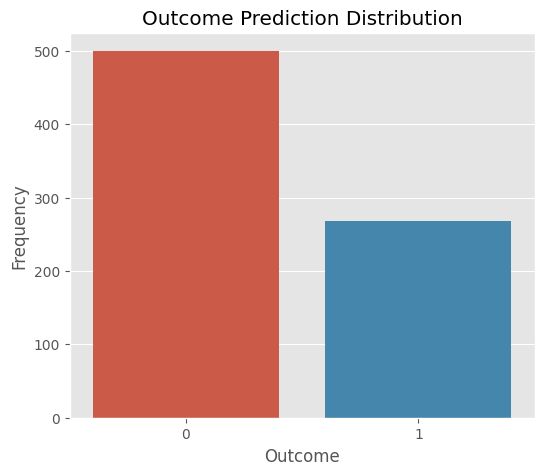

In [110]:
plt.figure(figsize=(6,5))
sns.countplot(data=df['Outcome'], x=df['Outcome'].index)
plt.title('Outcome Prediction Distribution')
plt.ylabel('Frequency')
plt.xlabel('Outcome')
plt.show()

Age Distribution against Blood Pressure

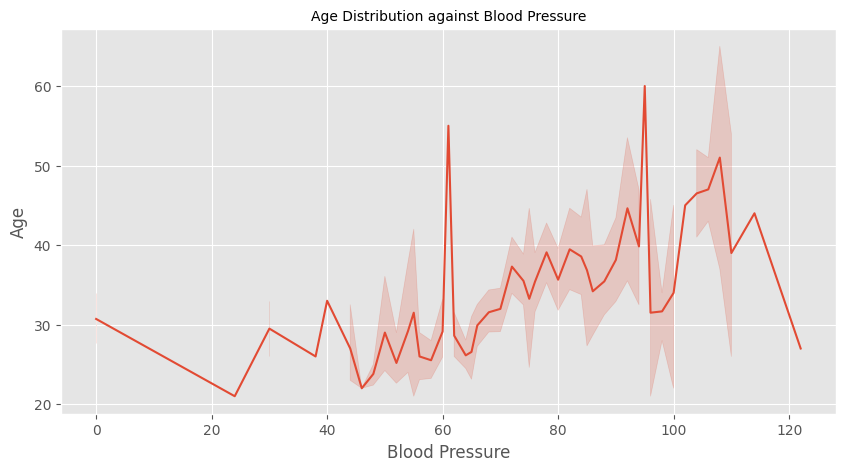

In [111]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df, y='Age', x='BloodPressure')
plt.title("Age Distribution against Blood Pressure", fontsize=10)
plt.xlabel('Blood Pressure')
plt.show()

What is the average Age of individuals with Blood Presure from 60 in relation to Diabetes Status. 

In [112]:
average_age = df[df['BloodPressure'] >= 60].groupby('Outcome')['Age'].agg(['mean']).astype(int)
print(average_age)

         mean
Outcome      
0          32
1          38


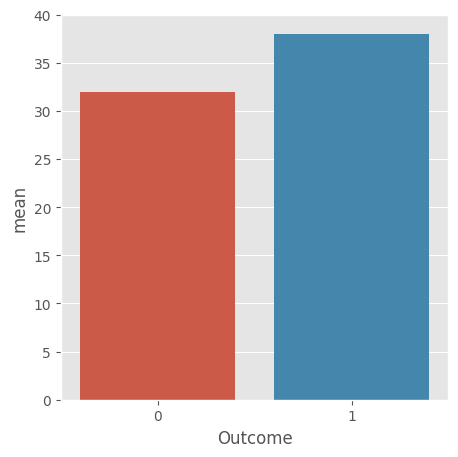

In [113]:
plt.figure(figsize=(5,5))
sns.barplot(data=average_age, x=average_age.index, y='mean')
plt.ylim(0,40)
plt.show()

Age Distribution

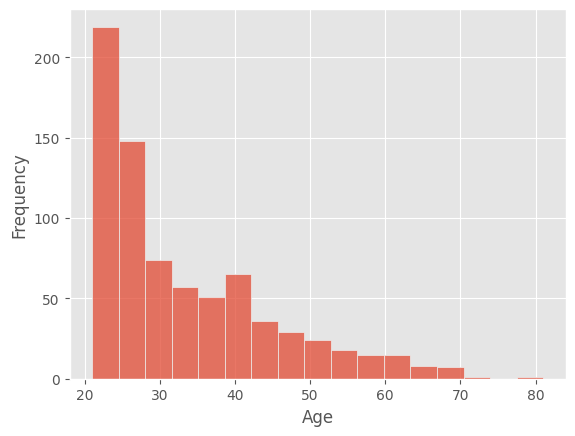

In [114]:
sns.histplot(data=df, x='Age')
plt.ylabel('Frequency')
plt.show()

Insulin Distribution

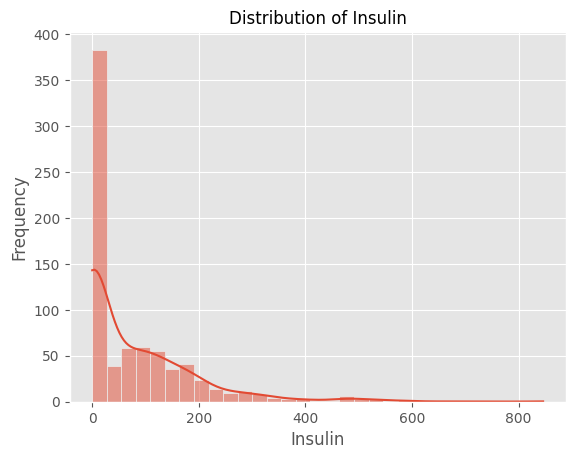

In [115]:
sns.histplot(data=df, x='Insulin', kde=True)
plt.title("Distribution of Insulin", fontsize=12)
plt.xlabel('Insulin')
plt.ylabel('Frequency')
plt.show()

In [116]:
df = df[['Glucose','BloodPressure', 'Insulin','BMI', 'Age','Outcome']]

Handling Imbalancing to prevent Overfitting

In [117]:
size=df[df.Outcome == 0].shape[0] - df[df.Outcome == 1].shape[0]

In [118]:
equal = {
        'Glucose':np.random.randint(0,199, size=size),
        'BloodPressure':np.random.randint(0,122, size=size),
        'Insulin':np.random.randint(0,846, size=size),
        'BMI':np.round(np.random.uniform(0.0,67.1,size=size),1),
        'Age':np.random.randint(22,81, size=size)
        }

In [119]:
df_update = pd.DataFrame(equal)
df_update['Outcome'] = 1

In [120]:
df = pd.concat([df,df_update], ignore_index=True)
df_pred = df.copy()

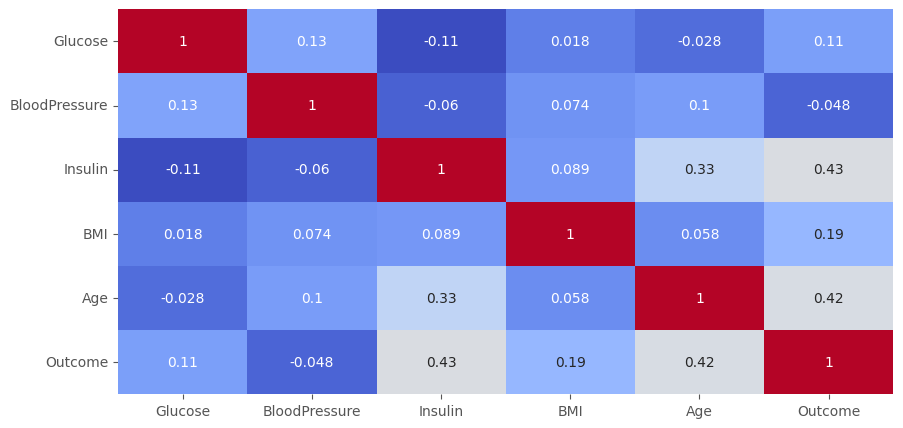

In [121]:
cm = df_pred.corr()
plt.figure(figsize=(10,5))
sns.heatmap(cm, cmap="coolwarm", annot=True, cbar=False)
plt.show()

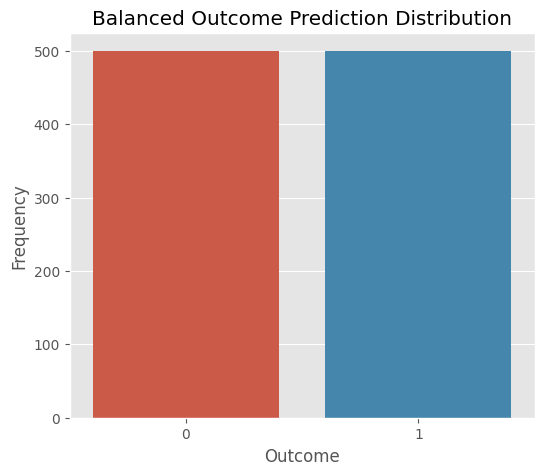

In [122]:
plt.figure(figsize=(6,5))
sns.countplot(data=df_pred['Outcome'], x=df_pred['Outcome'].index)
plt.title('Balanced Outcome Prediction Distribution')
plt.ylabel('Frequency')
plt.xlabel('Outcome')
plt.show()

Data Preprocessing

In [123]:
X = df_pred.iloc[:,:-1].values
y = df_pred.iloc[:,-1].values

In [124]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [125]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, classification_report, roc_curve, auc

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [127]:
gbc = GradientBoostingClassifier()
model = gbc.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [128]:
ac_score = accuracy_score(y_test, y_pred)
print(f'{np.ceil(ac_score * 100)}%')

80.0%


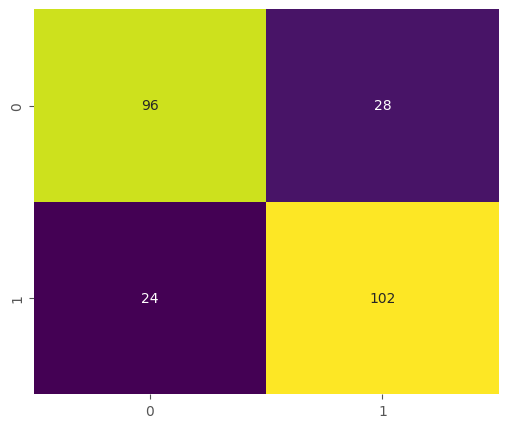

In [129]:
cm = confusion_matrix(y_test,y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, cmap='viridis', fmt='d', annot=True, cbar=False)
plt.show()

In [130]:
cp = classification_report(y_test,y_pred)
print(cp)

              precision    recall  f1-score   support

           0       0.80      0.77      0.79       124
           1       0.78      0.81      0.80       126

    accuracy                           0.79       250
   macro avg       0.79      0.79      0.79       250
weighted avg       0.79      0.79      0.79       250



In [131]:
mse = mean_squared_error(y_test,y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.208


In [132]:
# Predict probabilities of class 1 (positive class) on the test set
y_prob = gbc.predict_proba(X_test)[:, 1]

In [133]:
# Calculate ROC curve and ROC AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

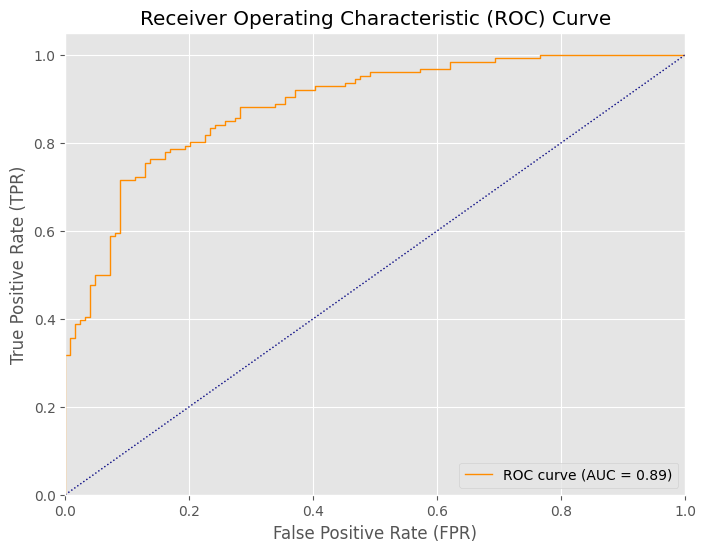

In [134]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=1, label=f'ROC curve (AUC = {np.round(roc_auc,2)})')
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='dotted')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Future Prediction

In [135]:
# def future_pred():
#         new_data = {
#             'Glucose':[int(input("Enter Glucose Level: "))],
#             'BloodPressure':[int(input("Enter Blood Pressure Level: "))],
#             'Insulin':[int(input("Enter Insulin Level: "))],
#             'BMI':[float(input("Enter BMI Level: "))],
#             'Age':[int(input("Enter Patient Age: "))]
#         }

#         new_df = pd.DataFrame(new_data)
#         new_X = new_df.iloc[:].values
#         return new_X


In [136]:
# new_X = future_pred()

# new_X_test = sc.transform(new_X)
# n_pred = gbc.predict(new_X_test)

# if n_pred[0] == 1:
#     print("Positive")
# elif n_pred[0] == 0:
#     print("Negative")
# else:
#     print("Unknown")